In [1]:
import sklearn

In [2]:
import statsmodels

In [3]:
# import common package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.datasets import load_boston

In [29]:
boston = load_boston()

In [30]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
boston['data'].shape

(506, 13)

In [33]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [34]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [35]:
df = pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
target = pd.Series(boston['target'])

In [37]:
df['PRICE'] = target

In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [41]:
bsDesc = []
for i in df.columns:
    bsDesc.append([i,
                   df[i].dtypes,
                   df[i].isna().sum(),
                   round(((df[i].isna().sum()/len(df))*100),2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values])
pd.DataFrame(data=bsDesc,
            columns=['Features',
                     'DataType',
                     'Null',
                     'NullPercentage',
                     'Unique',
                    'Unique Sample'])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,CRIM,float64,0,0.0,504,"[5.66998, 0.09744]"
1,ZN,float64,0,0.0,26,"[82.5, 40.0]"
2,INDUS,float64,0,0.0,76,"[15.04, 4.93]"
3,CHAS,float64,0,0.0,2,"[0.0, 1.0]"
4,NOX,float64,0,0.0,81,"[0.411, 0.469]"
5,RM,float64,0,0.0,446,"[5.701, 5.898]"
6,AGE,float64,0,0.0,356,"[81.8, 42.6]"
7,DIS,float64,0,0.0,412,"[2.1099, 6.4798]"
8,RAD,float64,0,0.0,9,"[4.0, 6.0]"
9,TAX,float64,0,0.0,66,"[245.0, 270.0]"


In [42]:
import warnings
warnings.filterwarnings('ignore')

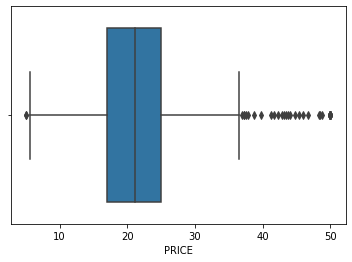

In [43]:
sns.boxplot(df['PRICE'])
plt.show()

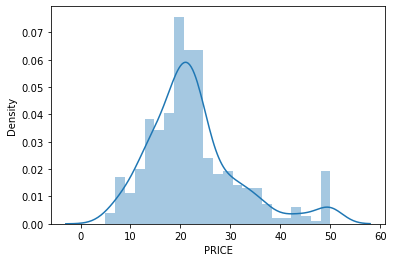

In [44]:
sns.distplot(df['PRICE'])
plt.show()

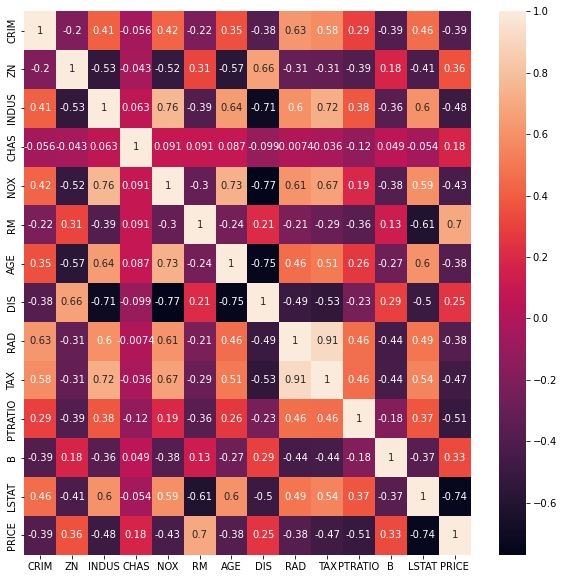

In [45]:
# Pearson
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

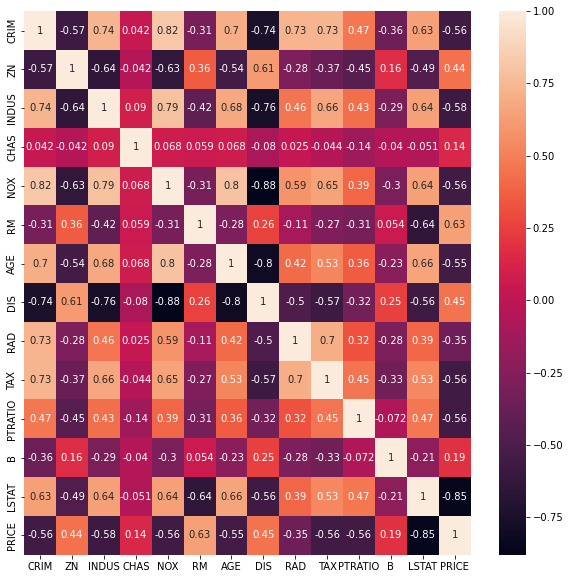

In [46]:
# Spearman
plt.figure(figsize=(10,10))
sns.heatmap(df.corr('spearman'),annot=True)
plt.show()

In [47]:
# Feature Engineering & feature selection

In [ ]:
# drop column which has correlation under 0.5 atau -0.5
df.drop(columns=['ZN', 'CHAS', 'DIS', 'RAD', 'B'], inplace =True)

In [49]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2


In [50]:
X = df.drop(columns='PRICE')
y = df['PRICE']

In [ ]:
# splitting data

In [ ]:
# Splitting ata

In [51]:
X = df.drop(columns ='PRICE') #features
y = df['PRICE'] #target

In [52]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =.85, random_state = 42)

In [54]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
104,0.13960,8.56,0.5200,6.167,90.0,384.0,20.9,12.33
203,0.03510,2.68,0.4161,7.853,33.2,224.0,14.7,3.81
381,15.87440,18.10,0.6710,6.545,99.1,666.0,20.2,21.08
489,0.18337,27.74,0.6090,5.414,98.3,711.0,20.1,23.97
69,0.12816,6.07,0.4090,5.885,33.0,345.0,18.9,8.79


In [55]:
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64

In [56]:
X_train.shape

(430, 8)

In [57]:
X_test.shape

(76, 8)

In [58]:
# Machine Learning Modelling

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
Model = LinearRegression()

In [61]:
Model.fit(X_train, y_train)

LinearRegression()

In [62]:
# quick evaluation

In [63]:
Model.score(X_train, y_train) #evaluation matrix train set

0.673312668221781

In [64]:
Model.score(X_test, y_test)

0.7714453755347112

In [66]:
Model = LinearRegression()
Model.fit(X_train, y_train)
Model.score(X_test, y_test)

0.7714453755347112

In [67]:
Model.predict(X_train)

array([21.14594257, 37.53402722, 16.90760971, 12.58762893, 22.39214307,
       10.82285499, 23.81734353,  7.55440798, 23.0439956 , 28.3746401 ,
       20.53884625, 25.30035335, 25.93566612, 21.0975144 , 23.90175066,
        6.93121496, 21.85818658, 20.58936803, 12.36984416, 22.80070962,
       23.30690703,  0.92402524, 17.70312697, 18.07469958, 20.86151628,
       24.93734057,  9.63145718, 20.37025269, 24.82857538, 14.21281627,
       18.70465247, 25.01923747, 21.40392364, 27.62158282, 11.48247872,
       19.76649536, 23.51203167, 24.32409138, 31.85083384, 18.66165798,
       33.35674755, 15.60801384, 19.05492486, 27.77211361, 20.18281491,
       25.59844751, 10.29347263, 24.22193766, 24.99105913, 23.09617558,
       27.0632802 , 32.69929852, 22.53763514, 38.27671915, 12.01283572,
       25.93347546, 20.28740461, 20.92031712, 10.81206871, 22.30778158,
       21.30724718, 32.82254006, 30.51556666, 17.48619733, 18.27318395,
       29.84459396, 23.52582538, 13.1345321 ,  6.05452648, 25.34

In [68]:
Model.predict(X_test)

array([27.71274247, 30.23806905, 18.66051364, 24.13199416, 18.31319309,
       24.22514792, 18.28744906, 13.90834399, 22.16132659, 20.04598494,
       21.15745083, 22.53911909, -3.90625733, 22.98858341, 20.15871788,
       24.56402377, 19.05417052,  3.79919279, 38.20565598, 17.25801826,
       24.42645913, 26.78912864, 12.72909004, 23.41995204, 17.94616649,
       14.9463433 , 22.7176821 , 19.08137175, 19.76669938, 18.81103808,
       20.78553255, 25.18417395, 24.54939544, 18.33816489, 15.77069527,
       20.86440106, 32.5712633 , 20.04999896, 20.5137149 , 23.62529659,
       12.88166894, 28.45077238, 38.8357686 , 18.67149668, 26.15787193,
       16.0312793 , 15.27980211, 24.89447908, 19.15463886, 31.00008999,
       24.76337213, 32.99565882, 16.84389851, 25.91249358, 37.38449384,
       22.01316199, 18.44502057, 29.32545687, 24.56403086, 16.38717112,
       24.99998824, 30.91175014, 28.47503362, 15.98630441, 27.84055577,
       13.85124593, 19.32512503, 25.09018597, 27.90682409, 15.74

In [69]:
Model.intercept_

20.924486266056945

In [70]:
Model.coef_

array([-7.45742987e-02,  6.22184157e-02, -8.00488739e+00,  4.35949056e+00,
        3.90064256e-02,  6.73181212e-04, -9.25250046e-01, -6.04583418e-01])

In [71]:
X_train.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [72]:
pd.DataFrame(data=Model.coef_, index=X_train.columns, columns=['Coef'])

,Coef
CRIM,-0.074574
INDUS,0.062218
NOX,-8.004887
RM,4.359491
AGE,0.039006
TAX,0.000673
PTRATIO,-0.925250
LSTAT,-0.604583


In [74]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
104,0.13960,8.56,0.5200,6.167,90.0,384.0,20.9,12.33
203,0.03510,2.68,0.4161,7.853,33.2,224.0,14.7,3.81
381,15.87440,18.10,0.6710,6.545,99.1,666.0,20.2,21.08
489,0.18337,27.74,0.6090,5.414,98.3,711.0,20.1,23.97
69,0.12816,6.07,0.4090,5.885,33.0,345.0,18.9,8.79


In [75]:
Model.predict([[0.5,20.50,0.5,7.5,32,250,15.77,10.25]])

array([31.48473982])

In [76]:
Model.intercept_ 

20.924486266056945

In [77]:
Model.predict([[0,0,0,0,0,0,0,0]])

array([20.92448627])

In [80]:
import statsmodels.api as sm

In [81]:
from statsmodels.api import OLS

In [82]:
sm_model = OLS(y_train, sm.add_constant(X_train))

In [83]:
result = sm_model.fit()

In [84]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     108.5
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           2.61e-97
Time:                        10:01:47   Log-Likelihood:                -1331.3
No. Observations:                 430   AIC:                             2681.
Df Residuals:                     421   BIC:                             2717.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9245      4.922      4.251      0.000      11.249      30.600
CRIM          -0.0746      0.037     -1.997      0.046      -0.148      -0.001
INDUS          0.0622      0.069      0.897      0.370      -0.074       0.198
NOX           -8.0049      4.349     -1.840      0.066     -16.554       0.544
RM             4.3595      0.482      9.038      0.000       3.411       5.308
AGE            0.0390      0.015      2.626      0.009       0.010       0.068
TAX            0.0007      0.003      0.247      0.805      -0.005       0.006
PTRATIO       -0.9253      0.146     -6.350      0.000      -1.212      -0.639
LSTAT         -0.6046      0.059    -10.199      0.000      -0.721      -0.488
==============================================================================
Omnibus:                      170.798   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.032
Skew:                           1.721   Prob(JB):                    1.65e-162
Kurtosis:                       8.453   Cond. No.                     9.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
pred_train = Model.predict(X_train)

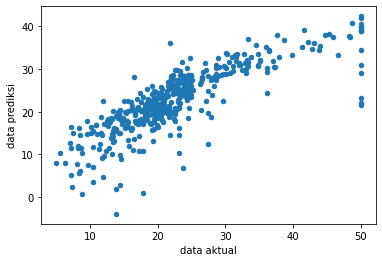

In [87]:
plt.scatter(y_train,pred_train, s=20)
plt.xlabel('data aktual')
plt.ylabel('data prediksi')
plt.show()

In [88]:
pred_test = Model.predict(X_test)

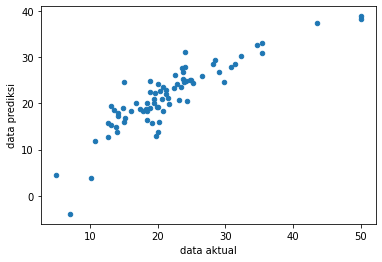

In [89]:
plt.scatter(y_test,pred_test, s=20)
plt.xlabel('data aktual')
plt.ylabel('data prediksi')
plt.show()

In [90]:
# evaluation matrix for regression

In [91]:
Error_train = y_train - pred_train

In [92]:
Error_test = y_test - pred_test

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

In [ ]:
# evaluation for train data

In [94]:
y_train.head() 

104    20.1
203    48.5
381    10.9
489     7.0
69     20.9
Name: PRICE, dtype: float64

In [95]:
pred_train = Model.predict(X_train) #predicting

In [96]:
r2_train = r2_score(y_train, pred_train)
r2_train

0.673312668221781

In [97]:
MAE_train = mean_absolute_error(y_train,pred_train)
MAE_train

3.766914642244403

In [98]:
MSE_train = mean_squared_error(y_train,pred_train)
MSE_train

28.62927531062651

In [99]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

5.350633169133024

In [ ]:
print('evaluation data training')
print('='*50)
print('R squared: ', r2_train)
print('MAE:', MAE_train)
print('MSE:', MSE_train)
print('RMSE:', RMSE_train)

hasil evaluasi data training
nilai R squared:  0.673312668221781
nilai MAE: 3.766914642244403
nilai MSE: 28.62927531062651
nilai RMSE: 5.350633169133024


In [101]:
np.mean(y_train)

22.68930232558141

In [102]:
MAE_train/np.mean(y_train)

0.16602161618682018

In [103]:
# evaluation matrix for data testing

In [104]:
y_test 

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
481    23.7
444    10.8
355    20.6
77     20.8
398     5.0
Name: PRICE, Length: 76, dtype: float64

In [105]:
pred_test = Model.predict(X_test)

In [106]:
r2_test = r2_score(y_test, pred_test)
r2_test

0.7714453755347112

In [107]:
MAE_test = mean_absolute_error(y_test,pred_test)
MAE_test

2.8160354794052758

In [108]:
MSE_test = mean_squared_error(y_test,pred_test)
MSE_test

14.925487511125297

In [109]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

3.8633518492528345

In [110]:
print('hasil evaluasi data training')
print('='*50)
print('nilai R squared: ', r2_test)
print('nilai MAE:', MAE_test)
print('nilai MSE:', MSE_test)
print('nilai RMSE:', RMSE_test)

hasil evaluasi data training
nilai R squared:  0.7714453755347112
nilai MAE: 2.8160354794052758
nilai MSE: 14.925487511125297
nilai RMSE: 3.8633518492528345


In [111]:
data = {'Training':[r2_train,MAE_train,MSE_train,RMSE_train],
        'Testing':[r2_test,MAE_test,MSE_test,RMSE_test]}

In [112]:
pd.DataFrame(data=data, index=['R Squared', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R Squared,0.673313,0.771445
MAE,3.766915,2.816035
MSE,28.629275,14.925488
RMSE,5.350633,3.863352


# improvement machine learning dengan feature engineering - polunomial features

In [113]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
x = df.drop(columns='PRICE')
y = df['PRICE']
df

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,273.0,21.0,6.48,22.0


In [115]:
poli = PolynomialFeatures(degree=5, include_bias=False, interaction_only = True)

In [116]:
X_poli = poli.fit_transform(X) # menghasilkan array

In [117]:
X_poli.shape

(506, 218)

In [118]:
df_1 = pd.DataFrame(data=X_poli)

In [119]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,0.014599,0.003400,...,1.459743e+06,75452.929537,3.425470e+05,3.396816e+06,1.044501e+06,339974.765098,17573.019953,79779.354386,7.911200e+05,9.668427e+06
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,0.193082,0.012808,...,7.922471e+06,582727.193032,1.787325e+06,2.196231e+07,1.023500e+06,525550.044934,38656.160330,118565.155891,1.456906e+06,1.994625e+07
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,0.192940,0.012799,...,3.026968e+06,222644.742878,8.818335e+05,7.498960e+06,8.869031e+05,200798.857549,14769.502745,58497.866847,4.974558e+05,7.620937e+06
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,0.070567,0.014825,...,4.560329e+05,38413.585577,1.861969e+05,1.218608e+06,6.093958e+05,95808.755510,8070.377153,39118.422010,2.560194e+05,3.911842e+06
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,0.150529,0.031625,...,9.992168e+05,84168.265553,3.447482e+05,2.614433e+06,7.365176e+05,209927.208174,17683.057625,72428.760016,5.492709e+05,8.571264e+06


In [120]:
df_1['PRICE'] = df['PRICE']

In [121]:
X_1 = df_1.drop(columns='PRICE')
y_1 = df_1['PRICE']

In [122]:
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

In [123]:
Model_Poli = LinearRegression()

In [124]:
Model_Poli.fit(X_train_P, y_train_P)

LinearRegression()

In [125]:
pred_train_P = Model_Poli.predict(X_train_P)
r2_train_P = r2_score(y_train_P, pred_train_P)
MAE_train_P = mean_absolute_error(y_train_P, pred_train_P)
MSE_train_P = mean_squared_error(y_train_P, pred_train_P)
RMSE_train_P = np.sqrt(MSE_train_P)

In [126]:
pred_test_P = Model_Poli.predict(X_test_P)
r2_test_P = r2_score(y_test_P, pred_test_P)
MAE_test_P = mean_absolute_error(y_test_P, pred_test_P)
MSE_test_P = mean_squared_error(y_test_P, pred_test_P)
RMSE_test_P = np.sqrt(MSE_test_P)

In [ ]:
# eva matrix comparison

In [127]:
data = {'Training LinReg':[r2_train,MAE_train,MSE_train,RMSE_train],
        'Testing LinReg':[r2_test,MAE_test,MSE_test,RMSE_test],
       'Training PolyNom':[r2_train_P,MAE_train_P,MSE_train_P,RMSE_train_P],
        'Testing PolyNom':[r2_test_P,MAE_test_P,MSE_test_P,RMSE_test_P]}
pd.DataFrame(data=data, index=['R Squared', 'MAE', 'MSE', 'RMSE'])

,Training LinReg,Testing LinReg,Training PolyNom,Testing PolyNom
R Squared,0.673313,0.771445,0.943285,0.263755
MAE,3.766915,2.816035,1.473133,4.925032
MSE,28.629275,14.925488,4.927053,53.991665
RMSE,5.350633,3.863352,2.219697,7.347902


In [128]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
104,0.13960,8.56,0.5200,6.167,90.0,384.0,20.9,12.33
203,0.03510,2.68,0.4161,7.853,33.2,224.0,14.7,3.81
381,15.87440,18.10,0.6710,6.545,99.1,666.0,20.2,21.08
489,0.18337,27.74,0.6090,5.414,98.3,711.0,20.1,23.97
69,0.12816,6.07,0.4090,5.885,33.0,345.0,18.9,8.79


In [129]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [130]:
scaler = RobustScaler()

In [131]:
 X_train_scaled = scaler.fit_transform(X_train)

In [132]:
X_test_scaled = scaler.transform(X_test)

In [133]:
Model_scaled = LinearRegression()

In [134]:
Model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# evaluation matrix - model with scalling

In [ ]:
# data training 

In [135]:
pred_train_S = Model_scaled.predict(X_train_scaled)
r2_train_S = r2_score(y_train, pred_train_S)
MAE_train_S = mean_absolute_error(y_train, pred_train_S)
MSE_train_S = mean_squared_error(y_train, pred_train_S)
RMSE_train_S = np.sqrt(MSE_train_S)

In [ ]:
# data testing

In [136]:
pred_test_S = Model_scaled.predict(X_test_scaled)
r2_test_S = r2_score(y_test, pred_test_S)
MAE_test_S = mean_absolute_error(y_test, pred_test_S)
MSE_test_S = mean_squared_error(y_test, pred_test_S)
RMSE_test_S = np.sqrt(MSE_test_S)

In [137]:
data = {'Training LinReg':[r2_train,MAE_train,MSE_train,RMSE_train],
        'Testing LinReg':[r2_test,MAE_test,MSE_test,RMSE_test],
       'Training PolyNom':[r2_train_P,MAE_train_P,MSE_train_P,RMSE_train_P],
        'Testing PolyNom':[r2_test_P,MAE_test_P,MSE_test_P,RMSE_test_P],
        'Training Scalled':[r2_train_S,MAE_train_S,MSE_train_S,RMSE_train_S],
        'Testing Scalled':[r2_test_S,MAE_test_S,MSE_test_S,RMSE_test_S]}
pd.DataFrame(data=data, index=['R Squared', 'MAE', 'MSE', 'RMSE'])

,Training LinReg,Testing LinReg,Training PolyNom,Testing PolyNom,Training Scalled,Testing Scalled
R Squared,0.673313,0.771445,0.943285,0.263755,0.673313,0.771445
MAE,3.766915,2.816035,1.473133,4.925032,3.766915,2.816035
MSE,28.629275,14.925488,4.927053,53.991665,28.629275,14.925488
RMSE,5.350633,3.863352,2.219697,7.347902,5.350633,3.863352


In [139]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2


In [140]:
X_1 = df.drop(columns='PRICE')
y_1 = df['PRICE']

In [141]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=.20, random_state=42)

In [142]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [143]:
Model_R = Ridge()

In [144]:
Model_R.fit(X_train_1, y_train_1)

Ridge()

In [145]:
pred_train_R = Model_R.predict(X_train_1)
r2_train_R = r2_score(y_train_1, pred_train_R)
MAE_train_R = mean_absolute_error(y_train_1, pred_train_R)
MSE_train_R = mean_squared_error(y_train_1, pred_train_R)
RMSE_train_R = np.sqrt(MSE_train_R)

In [146]:
pred_test_R = Model_R.predict(X_test_1)
r2_test_R = r2_score(y_test_1, pred_test_R)
MAE_test_R = mean_absolute_error(y_test_1, pred_test_R)
MSE_test_R = mean_squared_error(y_test_1, pred_test_R)
RMSE_test_R = np.sqrt(MSE_test_R)

In [147]:
data = {'Training LinReg':[r2_train,MAE_train,MSE_train,RMSE_train],
        'Testing LinReg':[r2_test,MAE_test,MSE_test,RMSE_test],
       'Training PolyNom':[r2_train_P,MAE_train_P,MSE_train_P,RMSE_train_P],
        'Testing PolyNom':[r2_test_P,MAE_test_P,MSE_test_P,RMSE_test_P],
        'Training Scalled':[r2_train_S,MAE_train_S,MSE_train_S,RMSE_train_S],
        'Testing Scalled':[r2_test_S,MAE_test_S,MSE_test_S,RMSE_test_S],
        'Training Ridge':[r2_train_R,MAE_train_R,MSE_train_R,RMSE_train_R],
        'Testing Ridge':[r2_test_R,MAE_test_R,MSE_test_R,RMSE_test_R]}
pd.DataFrame(data=data, index=['R Squared', 'MAE', 'MSE', 'RMSE']).T

,R Squared,MAE,MSE,RMSE
Training LinReg,0.673313,3.766915,28.629275,5.350633
Testing LinReg,0.771445,2.816035,14.925488,3.863352
Training PolyNom,0.943285,1.473133,4.927053,2.219697
Testing PolyNom,0.263755,4.925032,53.991665,7.347902
Training Scalled,0.673313,3.766915,28.629275,5.350633
Testing Scalled,0.771445,2.816035,14.925488,3.863352
Training Ridge,0.697088,3.606466,26.315017,5.129816
Testing Ridge,0.617442,3.386170,28.054400,5.296640


In [149]:

param_a = [0.001, 0.01, 1, 10, 20, 30, 40, 50, 100]
# Alpha = np.linspace()
# Alpha = np.arange (1,15,0.01)

In [ ]:
# ridge manual hyper parameter tuning

In [150]:
# eva matrix  - R2
train_r = []
test_r = []

for i in param_a:
    Model_R = Ridge(alpha=i)
    Model_R.fit(X_train_1, y_train_1)
    y_pred_tr = Model_R.predict(X_train_1)
    R2_train = r2_score(y_train_1, y_pred_tr)
    train_r.append(R2_train)
    y_pred_test = Model_R.predict(X_test_1)
    R2_test = r2_score(y_test_1, y_pred_test)
    test_r.append(R2_test)

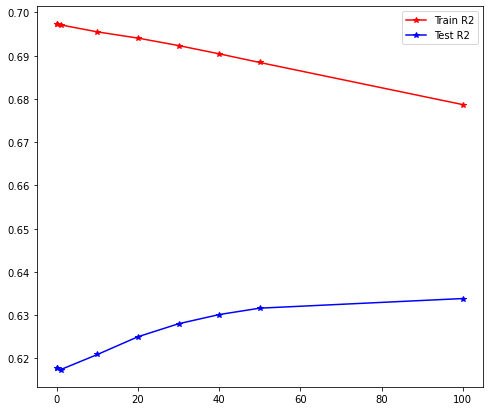

In [151]:
plt.figure(figsize=(8,7))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [152]:
np.max(test_r)

0.6338434526661912

In [153]:
np.argmax(test_r)

8

In [154]:
param_a[8]

100

In [155]:
param_a[np.argmax(test_r)]

100

In [156]:
Model_Best_R = Ridge(alpha=100)

In [157]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):   
    train_r = []
    test_r = []
    for i in Alpha:
        Model_R = Model(alpha=i)
        Model_R.fit(X_train, y_train)
        y_pred_tr = Model_R.predict(X_train)
        R2_train = r2_score(y_train_1, y_pred_tr)
        train_r.append(R2_train)
        y_pred_test = Model_R.predict(X_test_1)
        R2_test = r2_score(y_test_1, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [158]:
train_Enet, test_Enet = Manual_Tune(param_a, X_train_1, X_test_1, y_train_1, y_test_1, ElasticNet)

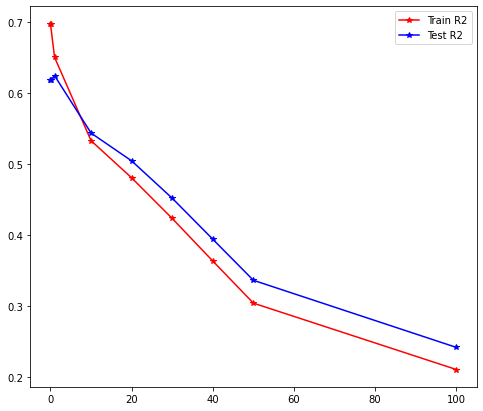

In [159]:
plt.figure(figsize=(8,7))
plt.plot(param_a, train_Enet, 'r*-')
plt.plot(param_a, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [ ]:
param_a[np.argmax(test_Enet)]

In [ ]:
train_Lasso, test_Lasso = Manual_Tune(param_a, X_train_1, X_test_1, y_train_1, y_test_1, ElasticNet)